# Visualizations 1

### bar chart with amount of orders per hour

### histogram of orders' cost

###  line chart with order_cost per day of the week

## Importing libraries

In [9]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

## Creating path for folder

In [11]:
path = r'/Users/ceciliamoura/Desktop/Career Foundry/Achievement4/Instacart Basket Analysis'

## Importing files

In [12]:
# Importing small sample of high-activity-only instacart

In [14]:
small = pd.read_pickle(os.path.join (path, 'Data', 'Final Prepared Data', 'IC_high_activity_small.pkl'))

In [34]:
small.head(50)

,order_id,product_id,add_to_cart_order,reordered,user_id,order_number,order_day_of_week,order_time,days_since_prior_order,product_name,...,Gender,State,Age,date_joined,n_dependants,fam_status,income,max_order_per_user,products_per_order,order_cost
0,2,33120,1,1,202279,3,5,9,8,Organic Egg Whites,...,Male,Idaho,57,2/6/2020,3,married,98119,8,9,91.6
2,2,9327,3,0,202279,3,5,9,8,Garlic Powder,...,Male,Idaho,57,2/6/2020,3,married,98119,8,9,91.6
3,2,45918,4,1,202279,3,5,9,8,Coconut Butter,...,Male,Idaho,57,2/6/2020,3,married,98119,8,9,91.6
6,2,40141,7,1,202279,3,5,9,8,Original Unflavored Gelatine Mix,...,Male,Idaho,57,2/6/2020,3,married,98119,8,9,91.6
10,3,24838,2,1,205970,16,5,17,12,Unsweetened Almondmilk,...,Male,Oregon,43,7/13/2019,2,married,149831,25,8,70.3
12,3,21903,4,1,205970,16,5,17,12,Organic Baby Spinach,...,Male,Oregon,43,7/13/2019,2,married,149831,25,8,70.3
13,3,17668,5,1,205970,16,5,17,12,Unsweetened Chocolate Almond Breeze Almond Milk,...,Male,Oregon,43,7/13/2019,2,married,149831,25,8,70.3
19,4,39758,3,1,178520,36,1,9,7,Chewy 25% Low Sugar Chocolate Chip Granola,...,Male,Maine,71,8/16/2019,2,married,76976,56,13,92.8
21,4,10054,5,1,178520,36,1,9,7,Kellogg's Nutri-Grain Apple Cinnamon Cereal,...,Male,Maine,71,8/16/2019,2,married,76976,56,13,92.8
22,4,21351,6,1,178520,36,1,9,7,Nutri-Grain Soft Baked Strawberry Cereal Break...,...,Male,Maine,71,8/16/2019,2,married,76976,56,13,92.8


In [86]:
small.shape

(9288143, 23)

In [13]:
instacart = pd.read_pickle(os.path.join (path, 'Data', 'Final Prepared Data', 'IC_high_activity_2.pkl'))

In [84]:
instacart.shape

(30963518, 23)

In [80]:
#Creating a subset just to understand how to get unique values for analysis

test = small.head(50)

In [42]:
test.shape

(50, 23)

In [48]:
test_subset = test[['order_id', 'order_day_of_week', 'order_cost']]

In [72]:
dups = test_subset[test_subset.duplicated()]

In [74]:
dups

,order_id,order_day_of_week,order_cost
2,2,5,91.6
3,2,5,91.6
6,2,5,91.6
12,3,5,70.3
13,3,5,70.3
21,4,1,92.8
22,4,1,92.8
23,4,1,92.8
28,4,1,92.8
42,5,6,210.7


In [76]:
# Creating a subset withou duplicates

test_subset_nodups = test_subset.drop_duplicates()

In [78]:
test_subset_nodups

,order_id,order_day_of_week,order_cost
0,2,5,91.6
10,3,5,70.3
19,4,1,92.8
31,5,6,210.7
56,6,1,27.5
60,7,2,12.7
64,9,0,110.0
79,10,6,132.8
93,11,1,21.8
103,12,6,106.1


### Creating a bar chart with amount of orders per hour

In [150]:
# Creating a subset with unique entries for each order

bar_order_dow = instacart[['order_day_of_week', 'order_id']]

In [96]:
bar_order_dow.head()

,order_day_of_week,order_id
0,5,2
1,5,2
2,5,2
3,5,2
4,5,2


In [92]:
# Creating a subset withou duplicates

bar_order_dow_nodups = bar_order_dow.drop_duplicates()

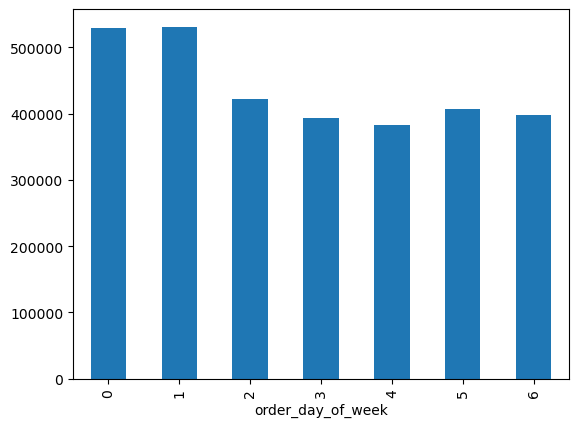

In [140]:
bar_order_dow = bar_order_dow_nodups['order_day_of_week'].value_counts().sort_index().plot.bar()

In [ ]:
### NEED HELP TO CHANGE X-TICKS LABELS AND ADD TITLE

In [122]:
# Define custom labels for the x-axis (day of week)
new_labels = ['Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']


In [102]:
# exporting plot

bar_order_dow.figure.savefig(os.path.join(path, 'Analysis','Final Visualization', 'order-dow-bar.png'))

<Axes: xlabel='order_day_of_week'>

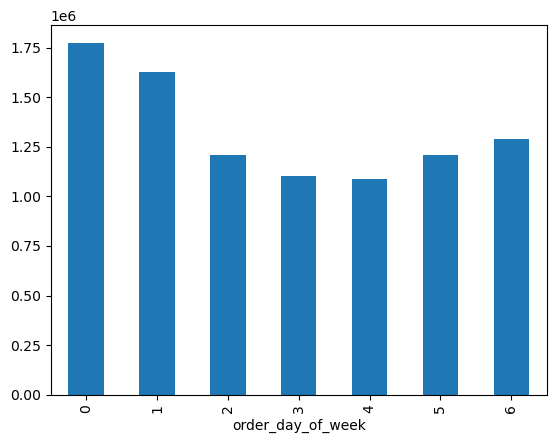

In [32]:
small['order_day_of_week'].value_counts().sort_index().plot.bar()

In [146]:
instacart.columns

Index(['order_id', 'product_id', 'add_to_cart_order', 'reordered', 'user_id',
       'order_number', 'order_day_of_week', 'order_time',
       'days_since_prior_order', 'product_name', 'aisle_id', 'department_id',
       'prices', 'Gender', 'State', 'Age', 'date_joined', 'n_dependants',
       'fam_status', 'income', 'max_order_per_user', 'products_per_order',
       'order_cost'],
      dtype='object')

### Creating a histogram of 'order cost'

In [15]:
# Creating a subset with unique entries for each order

his_order_cost = instacart[['order_cost', 'order_id']]

In [158]:
his_order_cost.shape

(30963518, 2)

In [17]:
# Creating a subset withou duplicates

his_order_cost_nodups = his_order_cost.drop_duplicates()

In [156]:
his_order_cost_nodups.shape

(3064375, 2)

In [19]:
his_order_cost_nodups['order_cost'].describe()

count    3.064375e+06
mean     7.870679e+01
std      6.008852e+01
min      0.000000e+00
25%      3.470000e+01
50%      6.440000e+01
75%      1.075000e+02
max      1.092200e+03
Name: order_cost, dtype: float64

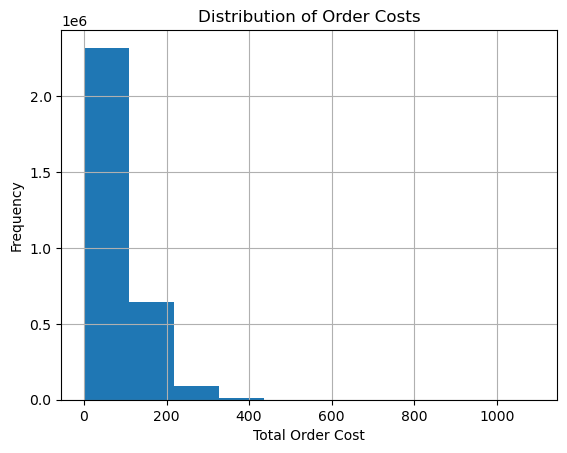

In [206]:
histogram_order_cost = his_order_cost_nodups['order_cost'].plot.hist(bins = 10)
plt.title('Distribution of Order Costs')
plt.xlabel('Total Order Cost')
plt.ylabel('Frequency')
plt.grid(True)

plt.show()

In [208]:
# exporting plot

histogram_order_cost.figure.savefig(os.path.join(path, 'Analysis','Final Visualization', 'hist_order_cost.png'))

### Creating a histogram of prices

In [34]:
# Creating a subset with ['prices'] column

prices = instacart['prices']

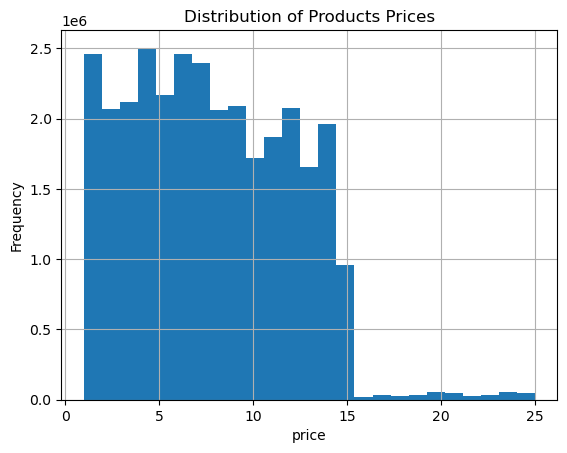

In [36]:
histogram_prices = instacart['prices'].plot.hist(bins = 25)
plt.title('Distribution of Products Prices')
plt.xlabel('price')
plt.ylabel('Frequency')
plt.grid(True)

plt.show()

In [38]:
# exporting plot

histogram_prices.figure.savefig(os.path.join(path, 'Analysis','Final Visualization', 'hist_prices.png'))

### Creating a line chart for 'order_day_of_week' and 'order_cost'

In [42]:
# Creating a subset with unique entries for each order

order_cost_per_day = instacart[['order_cost', 'order_id', 'order_day_of_week']]

In [44]:
order_cost_per_day.shape

(30963518, 3)

In [56]:
order_cost_per_day.head(10)

,order_cost,order_id,order_day_of_week
0,91.6,2,5
1,91.6,2,5
2,91.6,2,5
3,91.6,2,5
4,91.6,2,5
5,91.6,2,5
6,91.6,2,5
7,91.6,2,5
8,91.6,2,5
9,70.3,3,5


In [46]:
# Creating a subset withou duplicates

order_cost_per_day_no_dups = order_cost_per_day.drop_duplicates()

In [48]:
order_cost_per_day_no_dups.shape

(3064375, 3)

In [58]:
order_cost_per_day_no_dups.head(10)

,order_cost,order_id,order_day_of_week
0,91.6,2,5
9,70.3,3,5
17,92.8,4,1
30,210.7,5,6
56,27.5,6,1
59,12.7,7,2
61,2.4,8,4
62,110.0,9,0
77,132.8,10,6
92,21.8,11,1


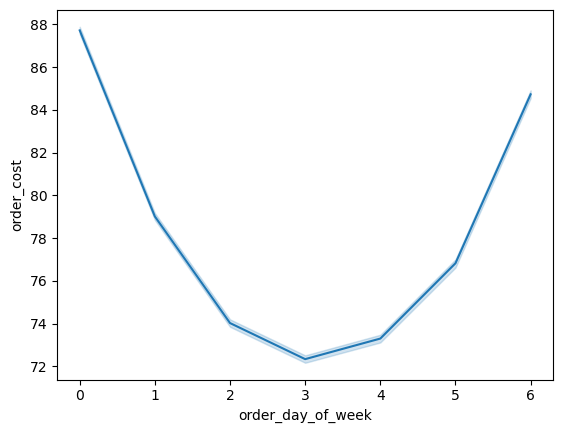

In [52]:
line_cost_day_of_week = sns.lineplot(data = order_cost_per_day_no_dups, x = 'order_day_of_week',y = 'order_cost')

In [54]:
# exporting plot

line_cost_day_of_week.figure.savefig(os.path.join(path, 'Analysis','Final Visualization', 'line_cost_per_day_of_week.png'))